In [253]:
import pandas as pd
from collections import Counter

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(20,20)})


In [254]:
Xtrain_2sec = pd.read_csv('../DataBarCrawl/fft_data/X_2_train.csv')
ytrain_2sec = pd.read_csv('../DataBarCrawl/fft_data/y_2_train.csv')
print(f'TRAIN DATA: X 2sec shape {Xtrain_2sec.shape}')
print(f'Class distribution is: {Counter(ytrain_2sec["0"])}')

Xtest_2sec = pd.read_csv('../DataBarCrawl/fft_data/X_2_test.csv')
ytest_2sec = pd.read_csv('../DataBarCrawl/fft_data/y_2_test.csv')
print(f'\nTEST DATA: X 2sec shape {Xtest_2sec.shape}')
print(f'Class distribution is: {Counter(ytest_2sec["0"])}')

TRAIN DATA: X 2sec shape (181, 94)
Class distribution is: Counter({0: 98, 1: 83})

TEST DATA: X 2sec shape (59, 94)
Class distribution is: Counter({0: 32, 1: 27})


In [255]:
Xtrain_5sec = pd.read_csv('../DataBarCrawl/fft_data/X_5_train.csv')
ytrain_5sec = pd.read_csv('../DataBarCrawl/fft_data/y_5_train.csv')
print(f'TRAIN DATA: X 5sec shape {Xtrain_5sec.shape}')
print(f'Class distribution is: {Counter(ytrain_5sec["0"])}')

Xtest_5sec = pd.read_csv('../DataBarCrawl/fft_data/X_5_test.csv')
ytest_5sec = pd.read_csv('../DataBarCrawl/fft_data/y_5_test.csv')
print(f'\nTEST DATA: X 2sec shape {Xtest_5sec.shape}')
print(f'Class distribution is: {Counter(ytest_5sec["0"])}')

TRAIN DATA: X 5sec shape (177, 94)
Class distribution is: Counter({1: 107, 0: 70})

TEST DATA: X 2sec shape (54, 94)
Class distribution is: Counter({1: 37, 0: 17})


In [256]:
X_10sec = pd.read_csv('../DataBarCrawl/fft_data/X_10_train.csv')
y_10sec = pd.read_csv('../DataBarCrawl/fft_data/y_10_train.csv')
print(f'X 10sec shape {X_10sec.shape}')
print(f'Class distribution is: {Counter(y_10sec["0"])}')

X 10sec shape (169, 94)
Class distribution is: Counter({1: 126, 0: 43})


# Feature Selection

In [257]:
data = pd.DataFrame()
data = Xtrain_2sec.copy()
data['class'] = ytrain_2sec
data.shape

(181, 95)

In [258]:
# data.info()

In [259]:
TARGET_THRESHOLD = 0.3
data_cor = data.corr()
cor_target = abs(data_cor["class"])

high_corr_features = cor_target[cor_target > TARGET_THRESHOLD]

feature_names = [index for index, value in high_corr_features.items()]

feature_names.remove('class')

print(f'important features : {feature_names},\nlength :  {len(feature_names)}')

important features : ['y_std', 'z_std', 'y_aad', 'z_aad', 'y_max', 'z_neg_count', 'y_pos_count', 'z_pos_count', 'x_peak_count', 'y_peak_count', 'z_peak_count', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis', 'z_mean_fft', 'y_std_fft', 'z_std_fft', 'y_aad_fft', 'z_aad_fft', 'z_min_fft', 'y_max_fft', 'z_max_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft', 'y_mad_fft', 'y_IQR_fft', 'z_peak_count_fft'],
length :  27


important features : ['y_std', 'z_std', 'y_aad', 'z_aad', 'y_max', 'z_neg_count', 'y_pos_count', 'z_pos_count', 'x_peak_count', 'y_peak_count', 'z_peak_count', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis', 'z_mean_fft', 'y_std_fft', 'z_std_fft', 'y_aad_fft', 'z_aad_fft', 'z_min_fft', 'y_max_fft', 'z_max_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft', 'y_mad_fft', 'y_IQR_fft', 'z_peak_count_fft'],
length :  27

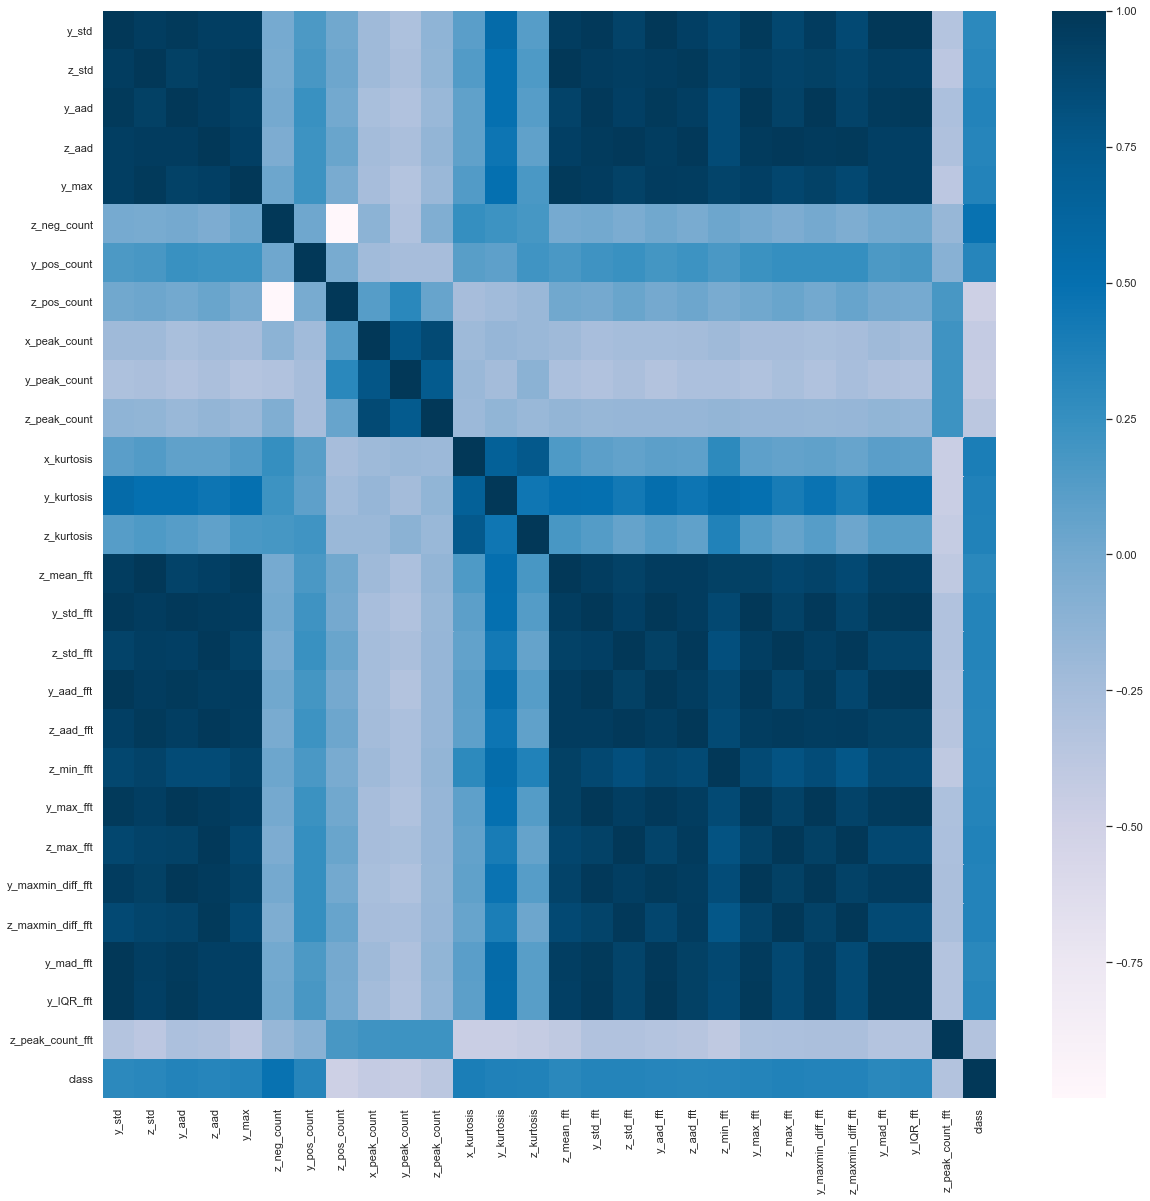

In [260]:
sub_features = feature_names

feature_names = feature_names + ['class']
sns.heatmap(data_cor.loc[feature_names][feature_names], cmap=plt.cm.PuBu);

In [261]:
# feature_names.remove('class')
# feature_names.remove()

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

In [263]:
ytrain_2sec = np.array(ytrain_2sec).ravel()
ytest_2sec = np.array(ytest_2sec).ravel()

In [264]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, r2_score

def evaluate_metrics(model, X_test, Y_test):
    y_hat = model.predict(X_test)
    
    acc = accuracy_score(Y_test, y_hat)
    roc = roc_auc_score(Y_test, y_hat)
    prec = precision_score(Y_test, y_hat)
    rec = recall_score(Y_test, y_hat)
    f1 = f1_score(Y_test, y_hat)
    r2 = r2_score(Y_test, y_hat)

    return acc, roc, prec, rec, f1, r2

def train_eval(model, X_train, X_test, Y_train, Y_test):

    scaler = StandardScaler().fit(X_train)
    Xtrain_scaled = scaler.transform(X_train)
    Xtest_scaled = scaler.transform(X_test)
    
    model.fit(Xtrain_scaled, Y_train)
    
    acc, roc, prec, rec, f1, r2 = evaluate_metrics(model, Xtest_scaled, Y_test)
    display_df = pd.DataFrame([[rec, f1, Xtest_scaled.shape[1]]], columns=["Recall", "F1 Score",'Feature Count'])

    return display_df

# RandomForest classifier on Window=2

In [265]:
model = RandomForestClassifier(criterion='entropy', random_state=47)
train_eval(model, Xtrain_2sec, Xtest_2sec, ytrain_2sec, ytest_2sec)
    

,Recall,F1 Score,Feature Count
0,0.888889,0.6,94


In [266]:
X_train = Xtrain_2sec[sub_features]
X_test = Xtest_2sec[sub_features]
train_eval(model, X_train, X_test, ytrain_2sec, ytest_2sec)


,Recall,F1 Score,Feature Count
0,0.888889,0.592593,27


# RandomForest Classifier on Window=5

In [277]:
ytrain_5sec = np.array(ytrain_5sec).ravel()
ytest_5sec = np.array(ytest_5sec).ravel()

model = RandomForestClassifier(criterion='entropy', random_state=47)
train_eval(model, Xtrain_5sec, Xtest_5sec, ytrain_5sec, ytest_5sec)
    

,Recall,F1 Score,Feature Count
0,0.945946,0.786517,94


In [275]:
X_train = Xtrain_5sec[sub_features]
X_test = Xtest_5sec[sub_features]
train_eval(model, X_train, X_test, ytrain_5sec, ytest_5sec)


,Recall,F1 Score,Feature Count
0,0.972973,0.8,27


In [283]:
rf_feat = list(zip(Xtrain_2sec.columns,model.feature_importances_))

In [291]:
sort_rf_feat = sorted(rf_feat, key=lambda x: x[1], reverse=True)
feat_rf = [x[0] for x in sort_rf_feat[:40]]
set(feat_rf).intersection(feature_names)

{'x_peak_count',
 'y_IQR_fft',
 'y_aad',
 'y_aad_fft',
 'y_mad_fft',
 'y_max',
 'y_max_fft',
 'y_maxmin_diff_fft',
 'y_peak_count',
 'y_std',
 'y_std_fft',
 'z_aad',
 'z_neg_count',
 'z_pos_count'}

# SVM classifier on Window=5

In [272]:
model = SVC(kernel='linear', probability=True)
train_eval(model, Xtrain_5sec, Xtest_5sec, ytrain_5sec, ytest_5sec)


,Recall,F1 Score,Feature Count
0,0.891892,0.758621,94


In [273]:
model = SVC(kernel='linear', probability=True)
X_train = Xtrain_5sec[sub_features]
X_test = Xtest_5sec[sub_features]
train_eval(model, X_train, X_test, ytrain_5sec, ytest_5sec)


,Recall,F1 Score,Feature Count
0,0.972973,0.808989,27
